In [3]:
%matplotlib inline
import pandas as pd
import numpy as np

np.random.seed(123)

students = ['Sally', 'Jane', 'Suzie', 'Billy', 'Ada', 'John', 'Thomas',
            'Marie', 'Albert', 'Richard', 'Isaac', 'Alan']

# randomly generate scores for each student for each subject
# note that all the values need to have the same length here
math_grades = np.random.randint(low=60, high=100, size=len(students))
english_grades = np.random.randint(low=60, high=100, size=len(students))
reading_grades = np.random.randint(low=60, high=100, size=len(students))

df = pd.DataFrame({'name': students,
                   'math': math_grades,
                   'english': english_grades,
                   'reading': reading_grades,
                   'classroom': np.random.choice(['A', 'B'], len(students))})

In [5]:
df

,name,math,english,reading,classroom
0,Sally,62,85,80,A
1,Jane,88,79,67,B
2,Suzie,94,74,95,A
3,Billy,98,96,88,B
4,Ada,77,92,98,A
5,John,79,76,93,B
6,Thomas,82,64,81,A
7,Marie,93,63,90,A
8,Albert,92,62,87,A
9,Richard,69,80,94,A


# Creating Dataframes

## From Lists and Dictionaries

In [6]:
pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})

#making a dataframe out of a dictionary 

,A,B
0,1,4
1,2,5
2,3,6


In [7]:
pd.DataFrame([[1, 2, 3], [4, 5, 6]])

#making a dataframe out of a list of list 

,0,1,2
0,1,2,3
1,4,5,6


In [8]:
data = np.array([[1, 2, 3], [4, 5, 6]])

pd.DataFrame(data, columns=['a', 'b', 'c'])

#making a dataframe out of an array 

,a,b,c
0,1,2,3
1,4,5,6


## From SQL

In [9]:
from env import host, user, password
#make a py file that has host, user, and password variables for your SQL server


url = f'mysql+pymysql://{user}:{password}@{host}/employees'
    
#protocol://[user[:password]@]hostname/[database_name] is standard format
## make sure to create a .py file to list your host server, username, and password as variables
###MAKE SURE TO PUT THIS FILE AS .gitignore SO IT IS NOT PUBLIC

In [4]:
pd.read_sql('SELECT * FROM employees LIMIT 5 OFFSET 50', url)
#provide a syntactically correct SQL command

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10051,1953-07-28,Hidefumi,Caine,M,1992-10-15
1,10052,1961-02-26,Heping,Nitsch,M,1988-05-21
2,10053,1954-09-13,Sanjiv,Zschoche,F,1986-02-04
3,10054,1957-04-04,Mayumi,Schueller,M,1995-03-13
4,10055,1956-06-06,Georgy,Dredge,M,1992-04-27


In [10]:
sql = '''
SELECT
    emp_no,
    first_name,
    last_name
FROM employees
WHERE gender = 'F'
LIMIT 5
OFFSET 200
'''

pd.read_sql(sql, url)

,emp_no,first_name,last_name
0,10513,Yuichiro,Schicker
1,10519,Yonghoan,Alencar
2,10522,Marke,Cesareni
3,10524,Shigehiro,Cincotta
4,10526,Kwangho,Theuretzbacher


In [11]:
query = '''
SELECT
    t.title as title,
    d.dept_name as dept_name
FROM titles t
JOIN dept_emp USING (emp_no)
JOIN departments d USING (dept_no)
'''

employees = pd.read_sql(query, url)

In [13]:
employees.head()

,title,dept_name
0,Staff,Customer Service
1,Senior Staff,Customer Service
2,Staff,Customer Service
3,Senior Staff,Customer Service
4,Staff,Customer Service


# Aggregation

In [14]:
df.reading.agg('min')

#.agg(x) will allow you to add a column to the table that shows the specified statistical function

67

In [15]:
df[['english', 'reading', 'math']].agg(['mean', 'min', 'max'])

#bracket syntax for multiple aggregations 

,english,reading,math
mean,77.666667,86.5,84.833333
min,62.000000,67.0,62.000000
max,99.000000,98.0,98.000000


## Grouping

In [16]:
df.groupby('classroom').math.max()

#.groupby rearranges the table to make the specified column the new index
##MUST be used with an aggregate function 

classroom
A    94
B    98
Name: math, dtype: int64

In [17]:
df.groupby('classroom').math.agg(['min', 'mean', 'max'])

,min,mean,max
classroom,,,
A,62,82.625,94
B,79,89.250,98


In [18]:
(df
 .assign(passing_math=df.math.apply(lambda n: 'failing' if n < 70 else 'passing'))
 #makes a new column with a bool value indicating whether student is passing math
 
 .groupby(['passing_math', 'classroom']) # note we now pass a list of columns
 #groups by newly created column
 
 .reading
 .agg(['mean', 'count']))

mean  count
passing_math classroom                  
failing      A          87.000000      2
passing      A          87.166667      6
             B          85.250000      4

In [19]:
df.assign(avg_math_score_by_classroom=df.groupby('classroom').math.transform('mean'))

#transform creates a uniform value for a new column in every row 


,name,math,english,reading,classroom,avg_math_score_by_classroom
0,Sally,62,85,80,A,82.625
1,Jane,88,79,67,B,89.250
2,Suzie,94,74,95,A,82.625
3,Billy,98,96,88,B,89.250
4,Ada,77,92,98,A,82.625
5,John,79,76,93,B,89.250
6,Thomas,82,64,81,A,82.625
7,Marie,93,63,90,A,82.625
8,Albert,92,62,87,A,82.625
9,Richard,69,80,94,A,82.625


In [20]:
df.groupby('classroom').reading.describe()

#.desribe() will show the summoned groupby and column with all .agg() stats

,count,mean,std,min,25%,50%,75%,max
classroom,,,,,,,,
A,8.0,87.125,8.887190,72.0,80.75,88.5,94.25,98.0
B,4.0,85.250,12.392874,67.0,82.75,90.5,93.00,93.0


# Merging and Joining

## concat

In [21]:
df1 = pd.DataFrame({'a': [1, 2, 3]})
df2 = pd.DataFrame({'a': [4, 5, 6]})

df1

,a
0,1
1,2
2,3


In [22]:
df2

,a
0,4
1,5
2,6


In [23]:
pd.concat([df1, df2])

#.concat will add tables vertically creating more rows 
##use reset_index to align indexes

,a
0,1
1,2
2,3
0,4
1,5
2,6


## merge

In [25]:
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})
users

,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN


In [26]:
roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})
roles

,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


In [27]:
pd.merge(users, roles, left_on='role_id', right_on='id', how='left')

#merge will combine tables horizontally similar to join in SQL

#left, right, and how indicate what columns the tables will be joined on

,id_x,name_x,role_id,id_y,name_y
0,1,bob,1.0,1.0,admin
1,2,joe,2.0,2.0,author
2,3,sally,3.0,3.0,reviewer
3,4,adam,3.0,3.0,reviewer
4,5,jane,NaN,NaN,NaN
5,6,mike,NaN,NaN,NaN


In [28]:
pd.merge(
    users.rename(columns={'id': 'user_id', 'name': 'username'}),
    roles.rename(columns={'name': 'role_name'}),
    left_on='role_id', right_on='id', how='left')

#panda will adjust column names by default resulting in duplicate columns

#rename columns to avoid this 

,user_id,username,role_id,id,role_name
0,1,bob,1.0,1.0,admin
1,2,joe,2.0,2.0,author
2,3,sally,3.0,3.0,reviewer
3,4,adam,3.0,3.0,reviewer
4,5,jane,NaN,NaN,NaN
5,6,mike,NaN,NaN,NaN


# Reshaping

In [29]:
df['passing_math'] = df.math.apply(lambda n: 'passing' if n >= 70 else 'failing')


In [30]:
df

,name,math,english,reading,classroom,passing_math
0,Sally,62,85,80,A,failing
1,Jane,88,79,67,B,passing
2,Suzie,94,74,95,A,passing
3,Billy,98,96,88,B,passing
4,Ada,77,92,98,A,passing
5,John,79,76,93,B,passing
6,Thomas,82,64,81,A,passing
7,Marie,93,63,90,A,passing
8,Albert,92,62,87,A,passing
9,Richard,69,80,94,A,failing


In [31]:
pd.crosstab(df.passing_math, df.classroom)

#will create a table comparing to columns

classroom,A,B
passing_math,,
failing,2,0
passing,6,4


In [32]:
pd.crosstab(df.passing_math, df.classroom, normalize=True)

#normaliz will show percentage of each quadrant 

classroom,A,B
passing_math,,
failing,0.166667,0.000000
passing,0.500000,0.333333


In [33]:
pd.crosstab(df.passing_math, df.classroom, margins=True)

#margins will show of totals of each column and row 

classroom,A,B,All
passing_math,,,
failing,2,0,2
passing,6,4,10
All,8,4,12


In [34]:
df.pivot_table(values='math', index='classroom', columns='passing_math', aggfunc='mean')

# a pivot table requires a value, and index, and columns, which it will combine into a table with a specified agg function


passing_math,failing,passing
classroom,,
A,65.5,88.333333
B,NaN,89.250000


In [35]:
n = 40

orders = pd.DataFrame({
    'drink': np.random.choice(['Tea', 'Water', 'Water'], n),
    'meal': np.random.choice(['Curry', 'Yakisoba Noodle', 'Pad Thai'], n),
})

prices = {
    'Yakisoba Noodle': 9,
    'Curry': 11,
    'Pad Thai': 10,
    'Tea': 2,
    'Water': 0,
}

# The .map method lets us use the above dictionary to calculate the total price for an order
orders['bill'] = orders.drink.map(prices) + orders.meal.map(prices)

orders.tail(5)

,drink,meal,bill
35,Water,Curry,11
36,Tea,Curry,13
37,Water,Pad Thai,10
38,Water,Curry,11
39,Water,Pad Thai,10


In [36]:
pd.crosstab(orders.drink, orders.meal)

meal,Curry,Pad Thai,Yakisoba Noodle
drink,,,
Tea,3,4,5
Water,9,10,9


In [37]:
pd.crosstab(orders.drink, orders.meal, normalize=True, margins=True)

meal,Curry,Pad Thai,Yakisoba Noodle,All
drink,,,,
Tea,0.075,0.10,0.125,0.3
Water,0.225,0.25,0.225,0.7
All,0.300,0.35,0.350,1.0


In [38]:
orders.pivot_table('bill', 'drink', 'meal')

meal,Curry,Pad Thai,Yakisoba Noodle
drink,,,
Tea,13,12,11
Water,11,10,9


In [39]:
orders.groupby(['drink', 'meal']).bill.mean()

drink  meal           
Tea    Curry              13
       Pad Thai           12
       Yakisoba Noodle    11
Water  Curry              11
       Pad Thai           10
       Yakisoba Noodle     9
Name: bill, dtype: int64

# More Dataframe Features

## Indices

<AxesSubplot:ylabel='Frequency'>

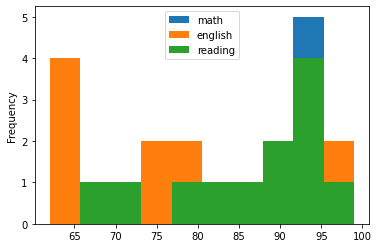

In [40]:
df.set_index('classroom').plot.hist()

## .pipe

In [41]:
def calculate_avg_grade(df):
    avg = (df.math + df.english + df.reading) / 3
    return df.assign(average_grade=avg)

df.pipe(calculate_avg_grade)

#.pipi(function) allows you to make a new column with the value being a result of a function

,name,math,english,reading,classroom,passing_math,average_grade
0,Sally,62,85,80,A,failing,75.666667
1,Jane,88,79,67,B,passing,78.000000
2,Suzie,94,74,95,A,passing,87.666667
3,Billy,98,96,88,B,passing,94.000000
4,Ada,77,92,98,A,passing,89.000000
5,John,79,76,93,B,passing,82.666667
6,Thomas,82,64,81,A,passing,75.666667
7,Marie,93,63,90,A,passing,82.000000
8,Albert,92,62,87,A,passing,80.333333
9,Richard,69,80,94,A,failing,81.000000


## .loc and .iloc

In [43]:
df.iloc[:3, 1:3]

#.iloc[a:b, y:z] will allow you to subset data on a table

## rows from a to b, columns y to z

,math,english
0,62,85
1,88,79
2,94,74


In [42]:
df.iloc[:3]

#can be used to subset the first 3 rows of the table 

,name,math,english,reading,classroom,passing_math
0,Sally,62,85,80,A,failing
1,Jane,88,79,67,B,passing
2,Suzie,94,74,95,A,passing


In [44]:
df.loc[:, 'math':'reading'].head(4)

#loc[:, 'x':'y'] will provide columns from x to y

,math,english,reading
0,62,85,80
1,88,79,67
2,94,74,95
3,98,96,88


## Transposing

In [45]:
df.T

#transposing flips the table horizontally 

,0,1,2,3,4,5,6,7,8,9,10,11
name,Sally,Jane,Suzie,Billy,Ada,John,Thomas,Marie,Albert,Richard,Isaac,Alan
math,62,88,94,98,77,79,82,93,92,69,92,92
english,85,79,74,96,92,76,64,63,62,80,99,62
reading,80,67,95,88,98,93,81,90,87,94,93,72
classroom,A,B,A,B,A,B,A,A,A,A,B,A
passing_math,failing,passing,passing,passing,passing,passing,passing,passing,passing,failing,passing,passing
